# Version 2.6 – Time Integrators: Euler vs RK4

> In this notebook, we validate and compare two explicit time-stepping schemes:

- Euler method (first-order)
- Runge–Kutta 4th-order (RK4)

> We test them on the ODE:  
**du/dt = -u** with exact solution **u(t) = u₀ · exp(-t)**

> We use our modular `BasePDESystem` with pluggable `step_func`, defined in:
- `core/time_integrators.py`
- `core/base_pde_system.py`

## Imports and Setup

### We import:
- `BasePDESystem` for running simulations
- `euler_step` and `rk4_step` from our new `time_integrators.py`

In [70]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))

from core.base_pde_system import BasePDESystem
from core.time_integrators import euler_step, rk4_step

## 📐 Problem Setup: Exponential Decay

### We test the simple ODE:

$$
\frac{du}{dt} = -u \quad \text{with} \quad u(0) = 1
$$

- Its exact solution is:

$$
u(t) = e^{-t}
$$

> This example gives us an analytical benchmark to evaluate the performance of different time integrators.

In [71]:
def rhs(u, t):
    return -u

def exact_solution(u0, t_array):
    return u0 * np.exp(-t_array)

## Initial Conditions

- We start with:

$$
u_0 = 1.0, \quad \Delta t = 0.1
$$

- We simulate for 100 steps, which gives a final time:

$$
T = 10
$$

> This time range is sufficient to observe both exponential decay and the growth of numerical error.

In [72]:
u0 = np.array([1.0])
dt = 0.1
steps = 100
t_array = np.linspace(0, dt * steps, steps + 1)

## Run the Simulations

### We solve the ODE using two methods:

- Euler method (1st order)
- RK4 method (4th order)

>Each is plugged into the `BasePDESystem` via the `step_func` argument.

In [73]:
euler_system = BasePDESystem(rhs_func=rhs, step_func=euler_step)
rk4_system = BasePDESystem(rhs_func=rhs, step_func=rk4_step)

u_euler = np.array(euler_system.evolve(u0, dt, steps)).flatten()
u_rk4 = np.array(rk4_system.evolve(u0, dt, steps)).flatten()
u_exact = exact_solution(u0, t_array)

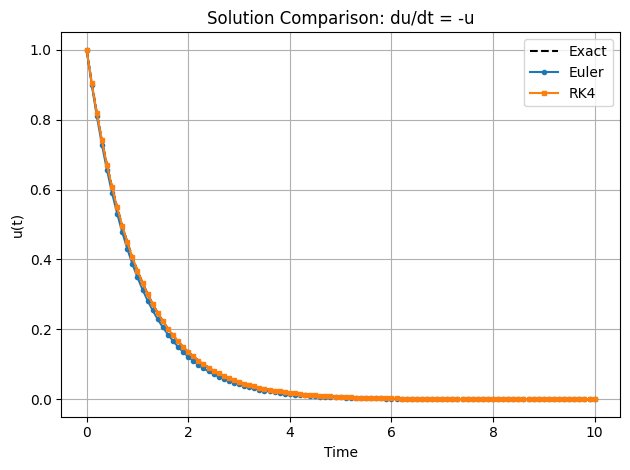

In [74]:
plt.plot(t_array, u_exact, label="Exact", linestyle="--", color="black")
plt.plot(t_array, u_euler, label="Euler", marker="o", markersize=3)
plt.plot(t_array, u_rk4, label="RK4", marker="s", markersize=3)
plt.xlabel("Time")
plt.ylabel("u(t)")
plt.title("Solution Comparison: du/dt = -u")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

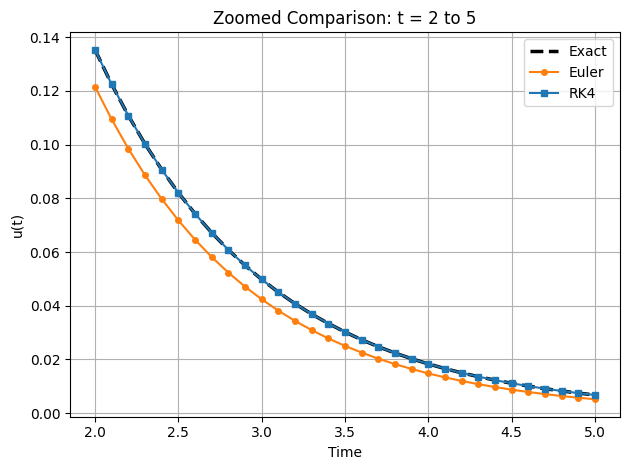

In [75]:
# Focus zoom between t=2 and t=5
mask = (t_array >= 2.0) & (t_array <= 5.0)

plt.plot(t_array[mask], u_exact[mask], label="Exact", linestyle="--", linewidth=2.5, color="black")
plt.plot(t_array[mask], u_euler[mask], label="Euler", marker="o", markersize=4, color="tab:orange")
plt.plot(t_array[mask], u_rk4[mask], label="RK4", marker="s", markersize=4, color="tab:blue")

plt.xlabel("Time")
plt.ylabel("u(t)")
plt.title("Zoomed Comparison: t = 2 to 5")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Summary: Version 2.6 — Time Integrator Comparison

In this notebook, we validated and compared two explicit time-stepping schemes:

- **Euler method** (1st-order, simple, but low accuracy)
- **RK4 method** (4th-order, higher precision with modest cost)

We used the test equation:

$$
\frac{du}{dt} = -u, \quad u(0) = 1
$$

with known solution:

$$
u(t) = e^{-t}
$$

and measured the performance of each integrator in terms of:

- **Visual match to the exact solution**
- **Zoomed comparisons**
- **L² error**
- **Absolute error over time (log scale)**

---

### Results:

- RK4 closely tracks the exact solution across all time — even visually indistinguishable
- Euler diverges early, especially after \( t > 2 \)
- Error plots and norms clearly show RK4 is more accurate by several orders of magnitude

---

### Engineering Takeaway:

Our new integrator module (`time_integrators.py`) is correct and modular.  
We can now plug in any time-stepping method into `BasePDESystem`, setting the stage for:

- Crank–Nicolson
- Adaptive stepping
- ML-guided control

**RK4 will be the default integrator for most PDEs** moving forward,  
offering a strong balance of accuracy and stability.  
In cases involving stiffness or extreme time scales, alternative methods like implicit schemes may be used.